# Kaggle Data Cleaning and Exploritory Data Analyses

Data cleaning incorporated some of the following techniques: 

https://www.kaggle.com/jagdmir/house-price-predictions-data-cleaning-eda

### Data Import

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import pearsonr
%matplotlib inline

# Used for auto-formatting code
# terminal - pip install nb_black
%load_ext nb_black

# Display all rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [118]:
# cd ..

<IPython.core.display.Javascript object>

In [119]:
# Import entire dataset
house_data = pd.read_csv("Data/train.csv")
house_data.drop("Id", 1, inplace=True)  # remove ID column because useless
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

In [120]:
# Determine size of dataset
house_data.shape  # 1460 rows x 80 columns

(1460, 80)

<IPython.core.display.Javascript object>

### Explore Missing Values

In [121]:
# Check Info for Missing Values
house_data.info()

# Results:
# Some variables missing values, also note dtypes for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

<IPython.core.display.Javascript object>

In [122]:
# Calculate number/percent of missing values

n_missing = pd.Series(house_data.isna().sum())  # number of missing values
perc_missing = n_missing / house_data.shape[0] * 100  # percent of missing values

# Convert to dataframe
missing_stats = pd.DataFrame([n_missing, perc_missing]).T.rename(
    columns={0: "n_missing", 1: "perc_missing"}
)

# Isolate only variables missing values
missing_stats.loc[missing_stats.n_missing != 0].sort_values(
    by="perc_missing", ascending=False
)


# Results:
# PoolQC (99.5%), Fence (80.8%), MiscFeature (96.3%),
# FireplaceQu (47.3%), Alley (93.8%), LotFrontage (17.8%)

,n_missing,perc_missing
PoolQC,1453.0,99.520548
MiscFeature,1406.0,96.301370
Alley,1369.0,93.767123
Fence,1179.0,80.753425
FireplaceQu,690.0,47.260274
LotFrontage,259.0,17.739726
GarageType,81.0,5.547945
GarageYrBlt,81.0,5.547945
GarageFinish,81.0,5.547945
GarageQual,81.0,5.547945


<IPython.core.display.Javascript object>

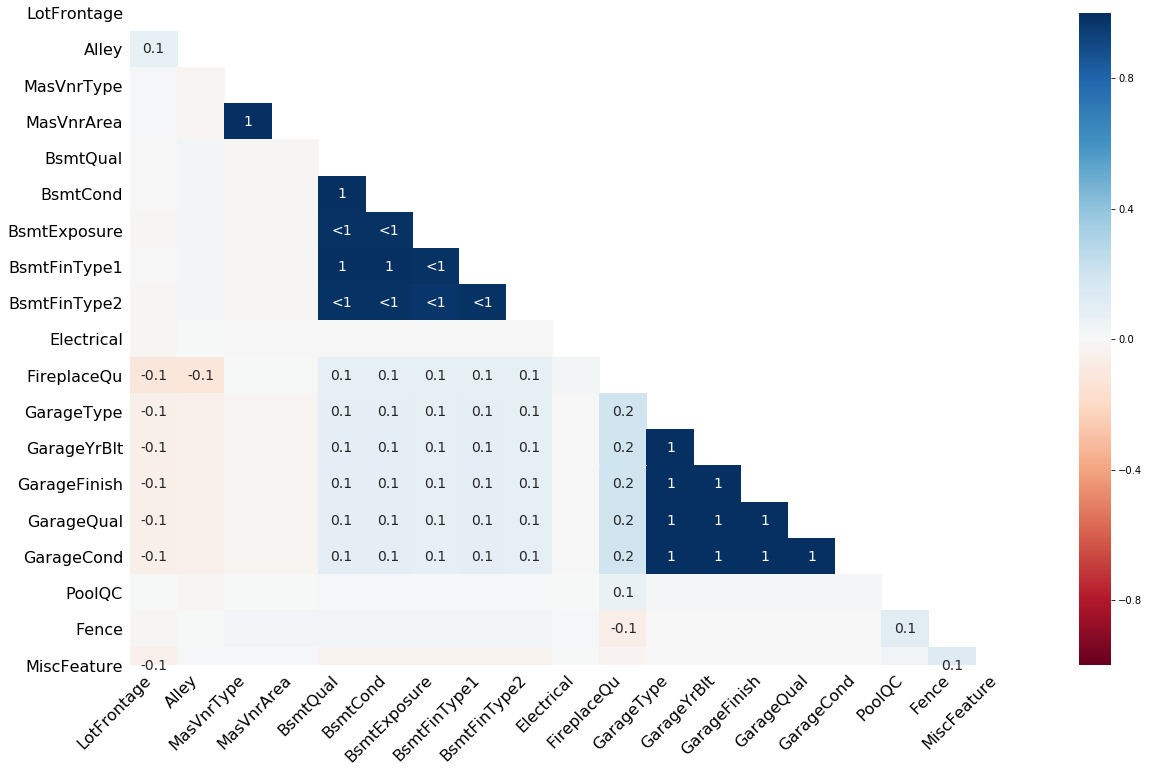

<IPython.core.display.Javascript object>

In [123]:
#What is the relationship between variables with missing values?

# terminal - pip install missingno
import missingno as msno

msno.heatmap(house_data) #returns heatmap with corr. coef.

#Results: Missing not at random!
    #Basement condition and sub-categories (condition, exposure, fintype1 and 2)
    #Garage year built, finish, quality, condition


## Exploritory Data Analysis

#### Response Variable

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

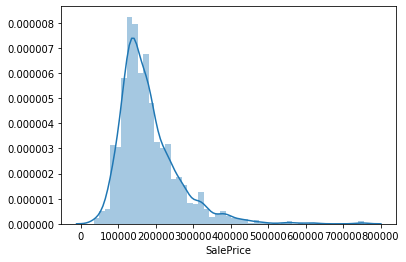

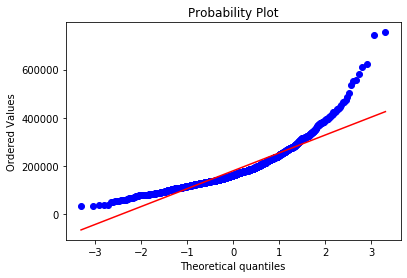

<IPython.core.display.Javascript object>

In [124]:
# Assess distribution of SalePrice

# Density plot to assess normal distribution
sns.distplot(house_data["SalePrice"])

# Probability plot to assess normal distribution
fig = plt.figure()  # must create new figure
stats.probplot(house_data["SalePrice"], plot=plt)

# Results:
# Response variable is non-normally distributed, must transform

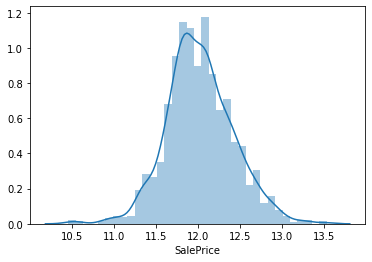

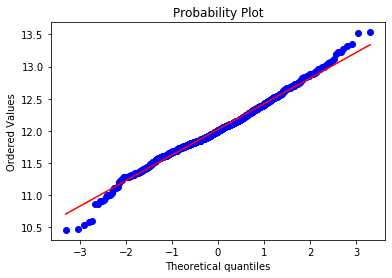

<IPython.core.display.Javascript object>

In [125]:
# Density plot to assess normal distribution
sns.distplot(np.log(house_data["SalePrice"]))

# Probability plot to assess normal distribution
fig = plt.figure()  # must create new figure
stats.probplot(np.log(house_data["SalePrice"]), plot=plt)

# Results:
# Log transform improves distribution of response variable
house_data["SalePrice_log"] = np.log(house_data["SalePrice"])


## Determine Datatype of Predictor Variables

In [419]:
# Separate predictors by numerical and categorical features
num_features = house_data.select_dtypes(include=["int64", "float64"]).columns
cat_features = house_data.select_dtypes(include=["object"]).columns


<IPython.core.display.Javascript object>

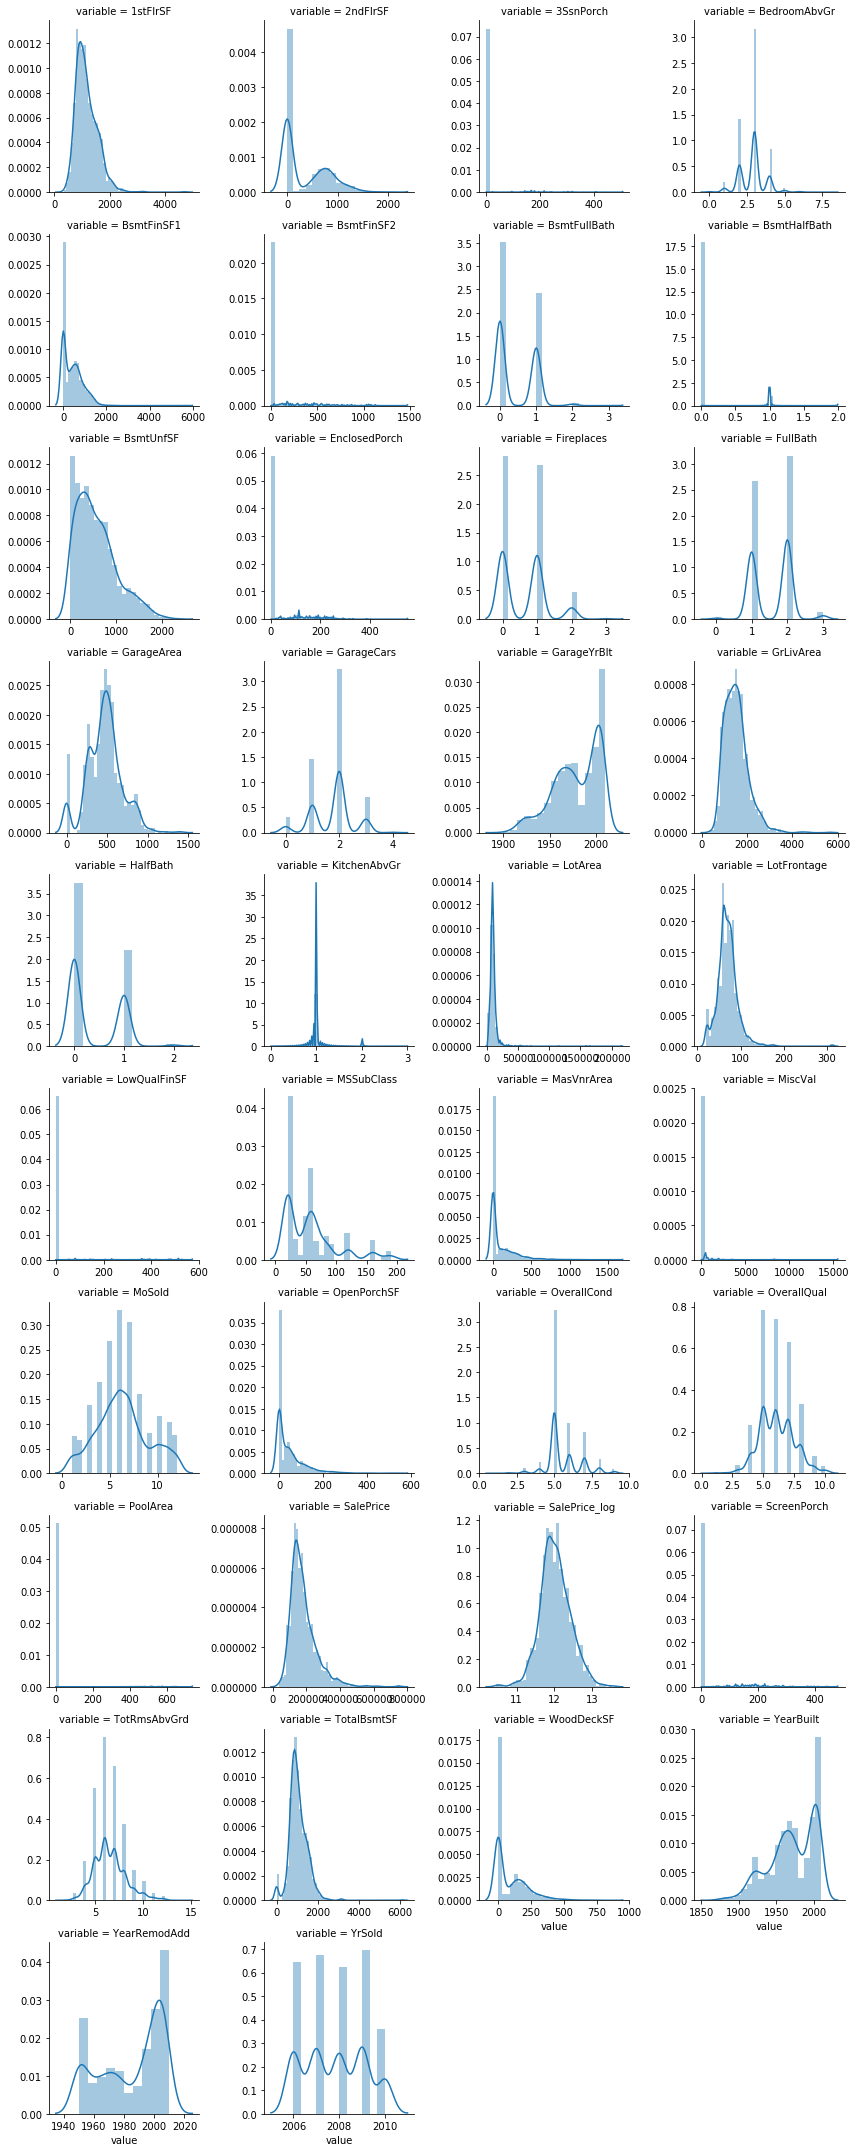

<IPython.core.display.Javascript object>

In [420]:
# Density Plot of Numeric Variables
f = pd.melt(house_data, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")


/Users/jonathanharris/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


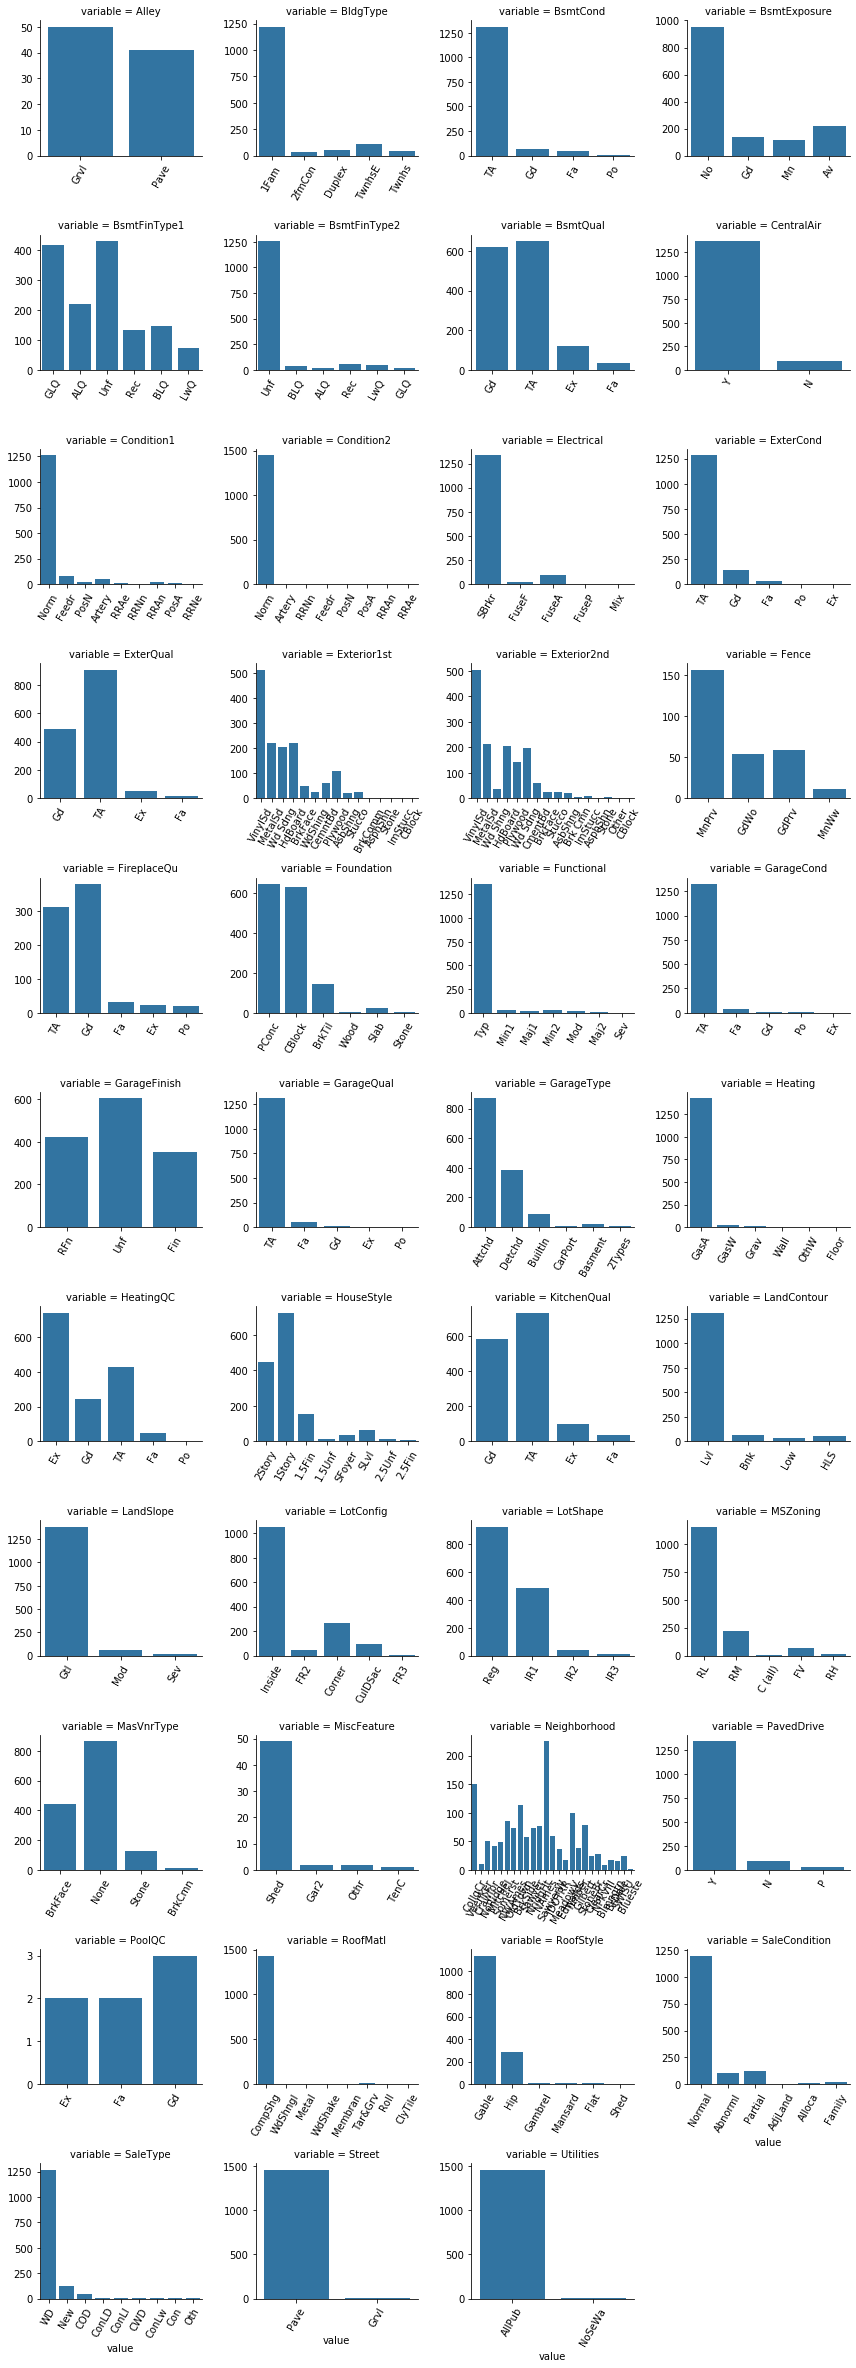

<IPython.core.display.Javascript object>

In [421]:
# Count plots of categorical features
f = pd.melt(house_data, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation="vertical")
g = g.map(sns.countplot, "value")
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

### Numerical Variable Analysis

In [422]:
# Further sort numerical features by continuous and discreet variables
num_cont_features = []
num_disc_features = []

# Remove SalePrice and SalePrice_log from feature list
num_features = num_features[0:-2]

# If more than 15 unique values, consider continuous
for colm in num_features:
    if house_data[colm].nunique() > 15:
        num_cont_features.append(colm)
    else:
        num_disc_features.append(colm)

# Print out sorted variables
print("Continuous Variables:", num_cont_features)
print("=" * 100)
print("Discreet Varaible:", num_disc_features)

Continuous Variables: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']
Discreet Varaible: ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']


<IPython.core.display.Javascript object>

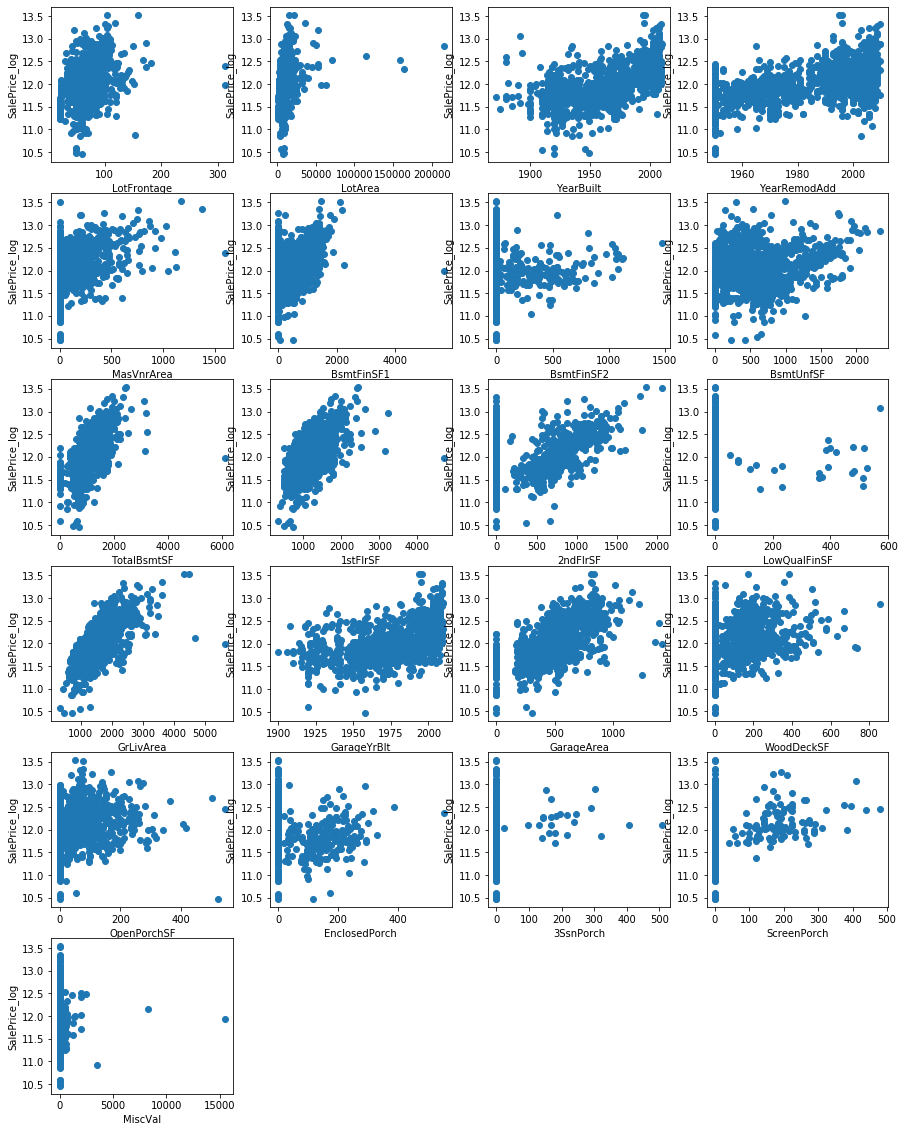

<IPython.core.display.Javascript object>

In [369]:
# Plot sales price as a function of CONTINUOUS numerical variable data
ncol = 4  # number of columns

plt.figure(figsize=(15, 20))
for idx, col in enumerate(num_cont_features):
    plt.subplot(math.ceil(len(num_cont_features) / ncol), ncol, idx + 1)
    plt.scatter(x=house_data[col], y=house_data["SalePrice_log"])
    plt.ylabel("SalePrice_log")
    plt.xlabel(col)


In [425]:
# Function to Quickly Summarize NA, Zero, and Correlation statistics
def dirty_summary(features):
    store = [["Predictor", "n_NA", "perc_NA", "n_zero", "perc_zero", "corr"]]

    for idx, feature in enumerate(features):
        data = house_data[[feature, "SalePrice_log"]]  # create df subset
        n_missing = data[feature].isna().sum()  # calc miss values
        perc_missing = n_missing / data[feature].shape[0] * 100  # calc %miss values

        new_data = data.dropna()  # remove missing data
        n_zero = sum(new_data[feature] == 0)  # calc num of zeros
        perc_zero = n_zero / new_data.shape[0] * 100  # calc %zeros
        corr_dropna = stats.pearsonr(
            new_data[feature].values, new_data["SalePrice_log"].values
        )[0]

        store.append(
            [
                feature,
                n_missing,
                round(perc_missing, 1),
                n_zero,
                round(perc_zero, 1),
                round(corr_dropna, 2),
            ]
        )

    analyses = pd.DataFrame(store[1:], columns=store[0])
    return analyses

<IPython.core.display.Javascript object>

In [426]:
dirty_summary(num_cont_features)

,Predictor,n_NA,perc_NA,n_zero,perc_zero,corr
0,LotFrontage,259,17.7,0,0.0,0.36
1,LotArea,0,0.0,0,0.0,0.26
2,YearBuilt,0,0.0,0,0.0,0.59
3,YearRemodAdd,0,0.0,0,0.0,0.57
4,MasVnrArea,8,0.5,861,59.3,0.43
5,BsmtFinSF1,0,0.0,467,32.0,0.37
6,BsmtFinSF2,0,0.0,1293,88.6,0.00
7,BsmtUnfSF,0,0.0,118,8.1,0.22
8,TotalBsmtSF,0,0.0,37,2.5,0.61
9,1stFlrSF,0,0.0,0,0.0,0.60


<IPython.core.display.Javascript object>

In [ ]:
#CONTINUOUS NUMERICAL DATA NOTES
      
# CORRELATION > 0.5
    # YearBuilt: Original construction date
    # YearRemodAdd: Remodel date (same as YearBuilt if no remod)
    # TotalBsmtSF: Total square feet of basement area
    # 1stFlrSF: First Floor square feet
    # GrLivArea: Above grade (ground) living area square feet
    # GarageYrBlt: Year garage was built
    # GarageArea: Size of garage in square feet
# POTENTIAL OUTLIERS
    # LotFrontage: Linear feet of street connected to property
    # LotArea: Lot size in square feet
    # BsmtFinSF1: Type 1 finished square feet
    # TotalBsmtSF: Total square feet of basement area
    # 1stFlrSF: First Floor square feet
    # GrLivArea: Above grade (ground) living area square feet
# LOTS OF ZEROS
    # MasVnrArea: Masonry veneer area in square feet
    # BsmtFinSF1: Type 1 finished square feet
    # BsmtFinSF2: Type 2 finished square feet
    # 2ndFlrSF: Second floor square feet
    # LowQualFinSF: Low quality finished square feet (all floors)
    # WoodDeckSF: Wood deck area in square feet
    # OpenPorchSF: Open porch area in square feet
    # EnclosedPorch: Enclosed porch area in square feet
    # 3SsnPorch: Three season porch area in square feet
    # ScreenPorch: Screen porch area in square feet
    # MiscVal: $Value of miscellaneous feature
# FEATURE ENGINEERING
    # Should we combine as 'House Age'?
        # YearBuilt: Original construction date
        # YearRemodAdd: Remodel date (same as YearBuilt if no remod)
    # Should we turn into binary? 
        # WoodDeckSF: Wood deck area in square feet
        # OpenPorchSF: Open porch area in square feet
        # EnclosedPorch: Enclosed porch area in square feet
        # 3SsnPorch: Three season porch area in square feet
        # ScreenPorch: Screen porch area in square feet
    # Should we turn into binary?
        # MiscVal: $Value of miscellaneous feature

In [427]:
#THIS DIDN'T WORK


# plt.figure(figsize=(15, 20))
# for idx, col in enumerate(num_cont_features):
#     print(col)
#     data = house_data[col]
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1
#     pred_out_idx = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)].index
#     plt.subplot(math.ceil(len(num_cont_features) / ncol), ncol, idx + 1)
#     plt.scatter(x=house_data[col], y=house_data['SalePrice_log'], c='blue')
#     plt.scatter(x=num_cont_outlier[col], y=num_cont_outlier['SalePrice_log'], c='red')
#     plt.ylabel("SalePrice_log")
#     plt.xlabel(col)




<IPython.core.display.Javascript object>

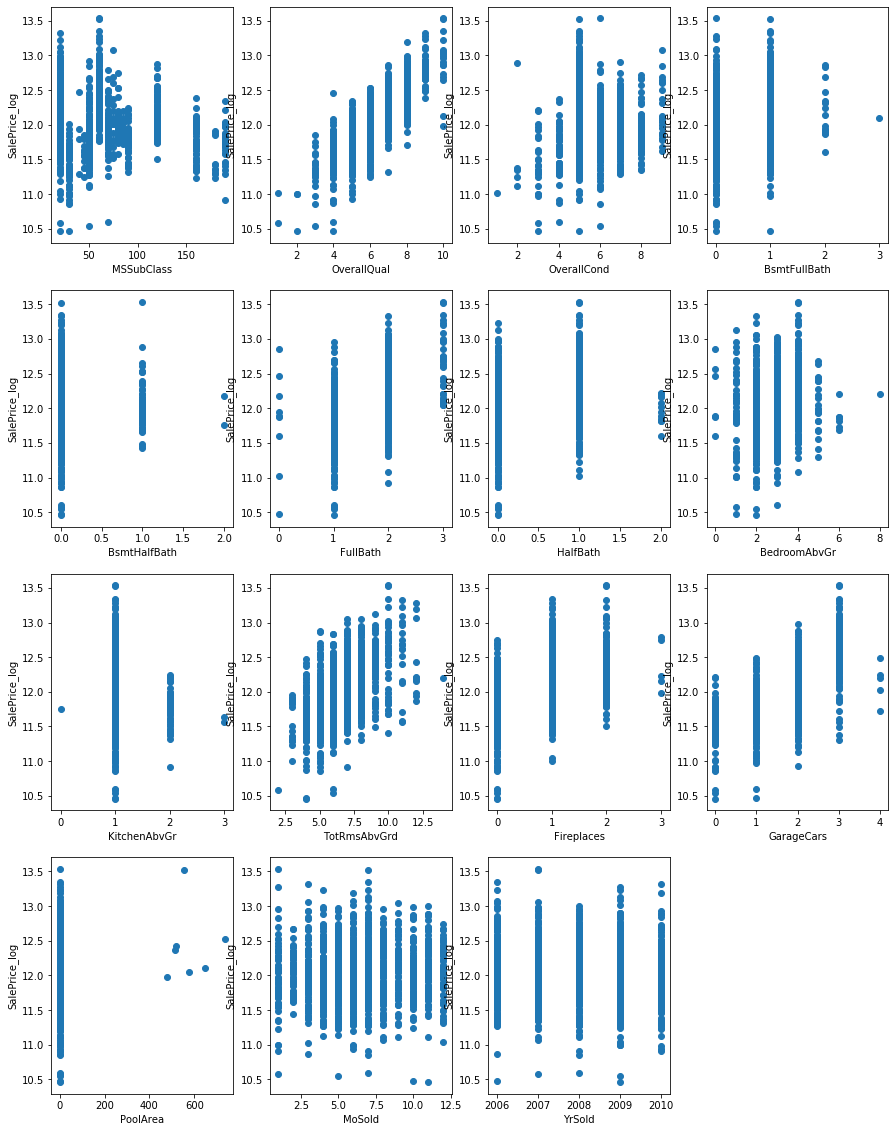

<IPython.core.display.Javascript object>

In [143]:
# Plot sales price as a function of DISCREET numerical variable data
ncol = 4  # number of columns

plt.figure(figsize=(15, 20))
for idx, col in enumerate(num_disc_features):
    plt.subplot(math.ceil(len(num_disc_features) / ncol), ncol, idx + 1)
    plt.scatter(x=house_data[col], y=house_data["SalePrice_log"])
    plt.ylabel("SalePrice_log")
    plt.xlabel(col)

In [428]:
dirty_summary(num_disc_features)

,Predictor,n_NA,perc_NA,n_zero,perc_zero,corr
0,MSSubClass,0,0.0,0,0.0,-0.07
1,OverallQual,0,0.0,0,0.0,0.82
2,OverallCond,0,0.0,0,0.0,-0.04
3,BsmtFullBath,0,0.0,856,58.6,0.24
4,BsmtHalfBath,0,0.0,1378,94.4,-0.01
5,FullBath,0,0.0,9,0.6,0.59
6,HalfBath,0,0.0,913,62.5,0.31
7,BedroomAbvGr,0,0.0,6,0.4,0.21
8,KitchenAbvGr,0,0.0,1,0.1,-0.15
9,TotRmsAbvGrd,0,0.0,0,0.0,0.53


<IPython.core.display.Javascript object>

In [ ]:
#DISCREET NUMERICAL DATA NOTES:

# CORRELATION > 0.5
    # TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    # OverallQual: Rates the overall material and finish of the house
    # GarageCars: Size of garage in car capacity
# POTENTIAL OUTLIERS
    # LotFrontage: Linear feet of street connected to property
    # LotArea: Lot size in square feet
    # BsmtFinSF1: Type 1 finished square feet
    # TotalBsmtSF: Total square feet of basement area
    # 1stFlrSF: First Floor square feet
    # GrLivArea: Above grade (ground) living area square feet
# LOTS OF ZEROS
    # Fireplaces: Number of fireplaces
    # PoolArea: Pool area in square feet
    # BsmtFullBath: Basement full bathrooms
    # BsmtHalfBath: Basement half bathrooms
    # HalfBath: Half baths above grade
# FEATURE ENGINEERING
    # Should we combine as single variable?
        # BsmtFullBath: Basement full bathrooms
        # BsmtHalfBath: Basement half bathrooms
        # FullBath: Full bathrooms above grade
        # HalfBath: Half baths above grade